# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 566


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=metric"
api = "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + units + api
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date     
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | ete
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | port glaud
City not found. Skipping...
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nar'yan-mar
Processing Record 8 of Set 1 | freetown
Processing Record 9 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | kerikeri
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 14 of Set 1 | kowary
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | kencong
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | selfo

Processing Record 38 of Set 4 | kayyerkan
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | sumbawa besar
Processing Record 42 of Set 4 | ko pha ngan
Processing Record 43 of Set 4 | dudinka
Processing Record 44 of Set 4 | douz
Processing Record 45 of Set 4 | mbuji-mayi
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | moquegua
Processing Record 48 of Set 4 | fort mcmurray
Processing Record 49 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 0 of Set 5 | tofol
Processing Record 1 of Set 5 | gagarawa
Processing Record 2 of Set 5 | korla
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | acapulco de juarez
Processing Record 5 of Set 5 | nasiriyah
Processing Record 6 of Set 5 | matoury
Processing Record 7 of Set 5 | al-`ula
City not found. Skipping...
Processing Record 8 of Set 5 | minas de marcona
Processing Record 9 of Set 5 | riolandia
Processing Record 

Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | sarandi grande
Processing Record 33 of Set 8 | woolgoolga
Processing Record 34 of Set 8 | afaahiti
Processing Record 35 of Set 8 | onega
Processing Record 36 of Set 8 | salekhard
Processing Record 37 of Set 8 | lana
Processing Record 38 of Set 8 | qasr-e qand
City not found. Skipping...
Processing Record 39 of Set 8 | center
Processing Record 40 of Set 8 | letlhakeng
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | weno
Processing Record 43 of Set 8 | staroye arakchino
City not found. Skipping...
Processing Record 44 of Set 8 | kourou
Processing Record 45 of Set 8 | port alfred
Processing Record 46 of Set 8 | elk city
Processing Record 47 of Set 8 | longboat key
Processing Record 48 of Set 8 | sambava
Processing Record 49 of Set 8 | labytnangi
Processing Record 0 of Set 9 | tubarjal
Processing Record 1 of Set 9 | mocimboa
Processing Record 2 of Set 9 | governor's harbour
City not fo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,5.14,80,15,1.69,GS,1704710523
1,ete,7.0500,7.4500,33.60,24,10,2.43,NG,1704710738
2,waitangi,-43.9535,-176.5597,13.79,85,56,0.45,NZ,1704710738
3,isangel,-19.5500,169.2667,26.39,86,50,1.57,VU,1704710738
4,albany,42.6001,-73.9662,-2.73,82,21,0.89,US,1704710739


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.14,80,15,1.69,GS,1704710523
1,ete,7.0500,7.4500,33.60,24,10,2.43,NG,1704710738
2,waitangi,-43.9535,-176.5597,13.79,85,56,0.45,NZ,1704710738
3,isangel,-19.5500,169.2667,26.39,86,50,1.57,VU,1704710738
4,albany,42.6001,-73.9662,-2.73,82,21,0.89,US,1704710739


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

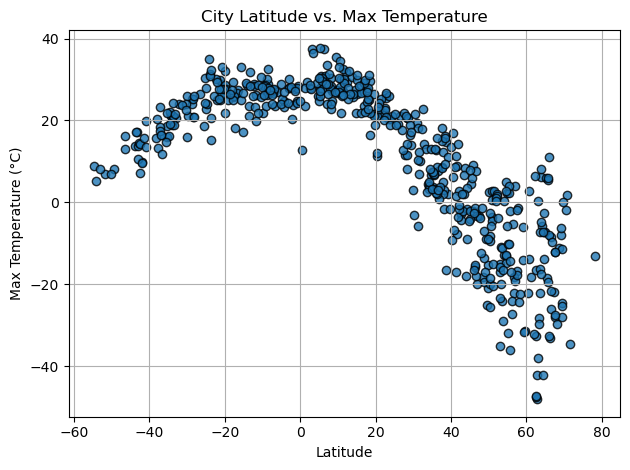

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

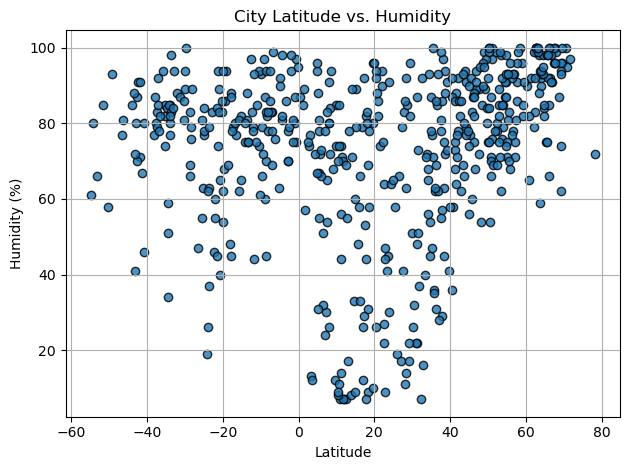

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

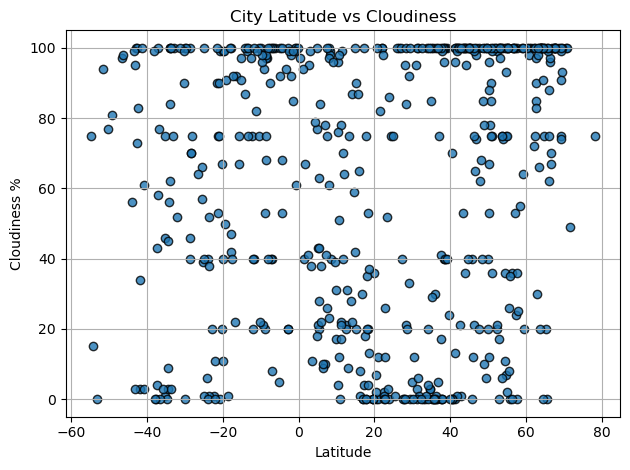

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

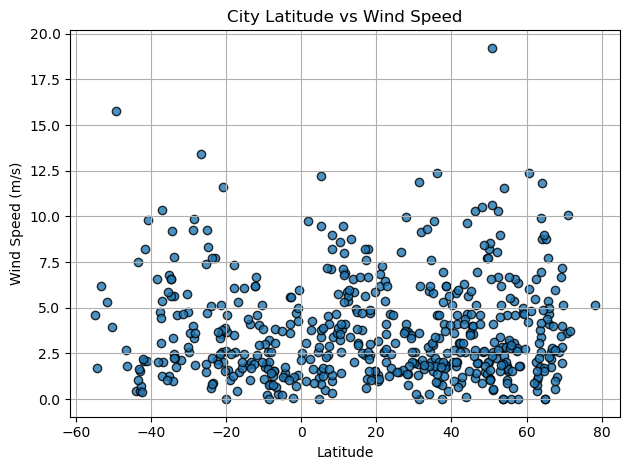

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values,y_values,ytitle,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values) #Call linregress function from scipy.stats
    regress_values = x_values * slope + intercept #Calculate linear regression line
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)) #Create string version of linear regression equation
    
    # Plot
    plt.scatter(x_values,y_values) #Create base scatter plot
    plt.plot(x_values, regress_values, "r-") #Add the calculated regression line to scatter plot (in red colour)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red") #Add the regression equation to scatter plot (in red colour & specified func input co-ordinates)
    plt.xlabel("Latitude") #Add x title (always latitude)
    plt.ylabel(ytitle) #Add y title from func input string
    print(f"The r-value is: {rvalue}") #Print the correlation coefficient r
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ete,7.0500,7.4500,33.60,24,10,2.43,NG,1704710738
4,albany,42.6001,-73.9662,-2.73,82,21,0.89,US,1704710739
5,nar'yan-mar,67.6713,53.0870,-12.16,96,100,2.68,RU,1704710739
6,freetown,8.4840,-13.2299,24.84,94,40,3.40,SL,1704710739
7,vorgashor,67.5833,63.9500,-27.96,100,100,0.54,RU,1704710740


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.14,80,15,1.69,GS,1704710523
2,waitangi,-43.9535,-176.5597,13.79,85,56,0.45,NZ,1704710738
3,isangel,-19.5500,169.2667,26.39,86,50,1.57,VU,1704710738
8,kerikeri,-35.2268,173.9474,16.06,85,1,1.29,NZ,1704710740
9,puerto natales,-51.7236,-72.4875,6.95,85,94,5.30,CL,1704710740


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8669438631789503


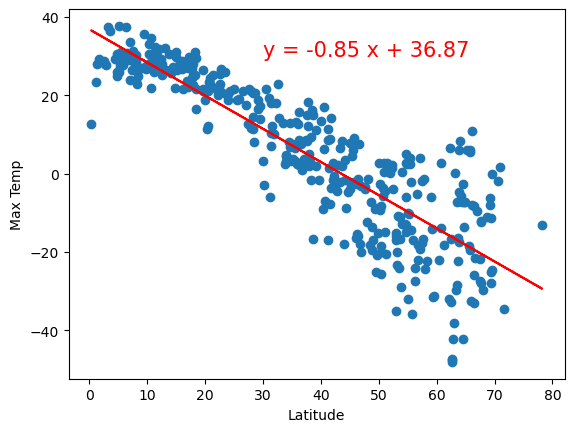

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (30,30))

The r-value is: 0.7399932539605342


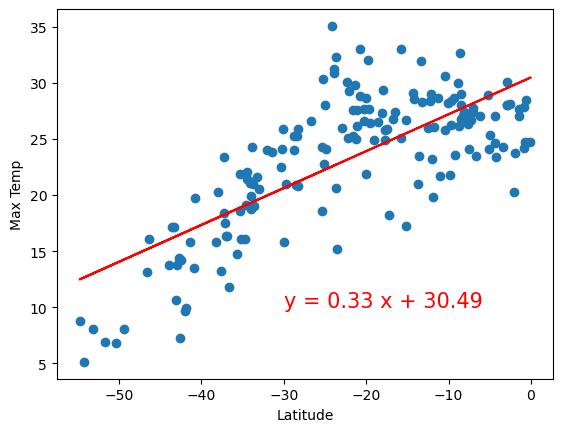

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,10))

**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5060059242121197


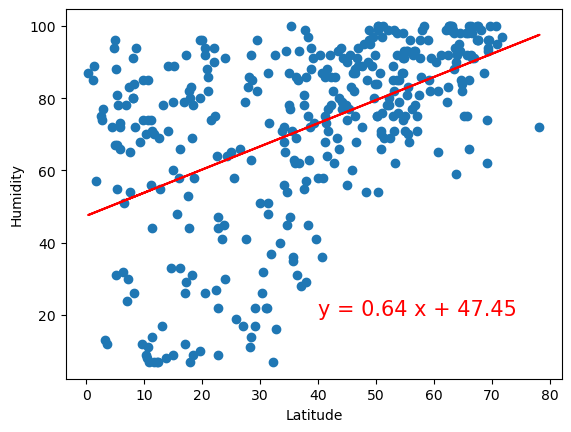

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,20))

The r-value is: 0.09875720987345116


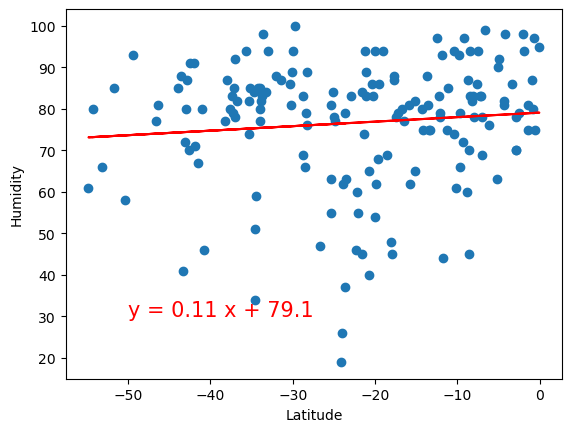

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.31842510566346743


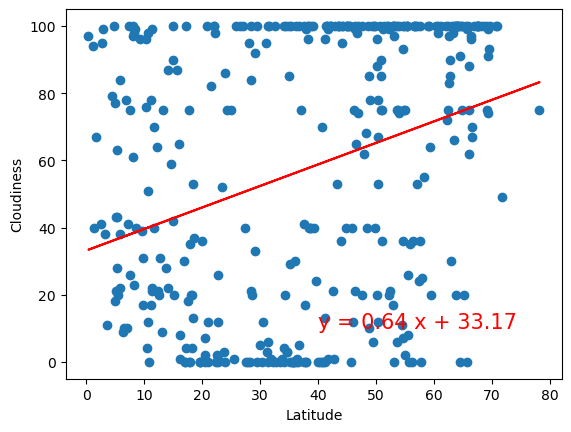

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-value is: 0.21547525551662483


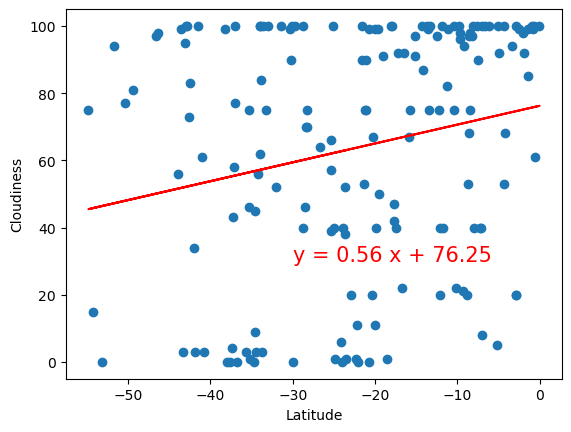

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.006791278807690798


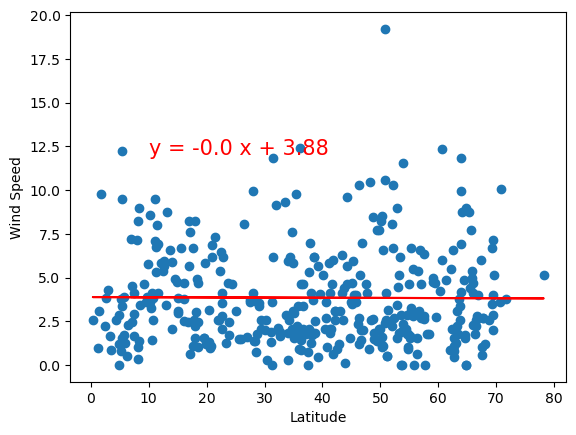

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,12))

The r-value is: -0.2499703374841209


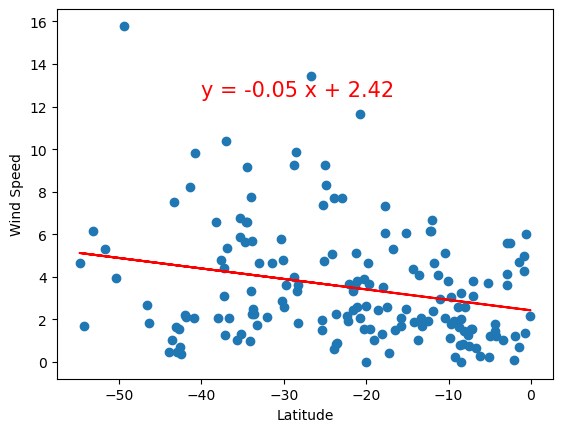

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-40,12.5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE